In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


cases = pd.read_csv("https://data.ca.gov/dataset/590188d5-8545-4c93-a9a0-e230f0db7290/resource/926fd08f-cc91-4828-af38-bd45de97f8c3/download/statewide_cases.csv")
cases_age = pd.read_csv("https://data.ca.gov/dataset/590188d5-8545-4c93-a9a0-e230f0db7290/resource/339d1c4d-77ab-44a2-9b40-745e64e335f2/download/case_demographics_age.csv")
testing = pd.read_csv("https://data.ca.gov/dataset/efd6b822-7312-477c-922b-bccb82025fbe/resource/b6648a0d-ff0a-4111-b80b-febda2ac9e09/download/statewide_testing.csv")
hospital_data = pd.read_csv("https://data.ca.gov/dataset/529ac907-6ba1-4cb7-9aae-8966fc96aeef/resource/42d33765-20fd-44b8-a978-b083b7542225/download/hospitals_by_county.csv")
ppe = pd.read_csv("https://data.ca.gov/dataset/da1978f2-068c-472f-be2d-04cdec48c3d9/resource/7d2f11a4-cc0f-4189-8ba4-8bee05493af1/download/logistics_ppe.csv")
cases_race = pd.read_csv("https://data.ca.gov/dataset/590188d5-8545-4c93-a9a0-e230f0db7290/resource/7e477adb-d7ab-4d4b-a198-dc4c6dc634c9/download/case_demographics_ethnicity.csv")


cases.to_csv("")

In [ ]:
for index in cases_age.index:
  if (cases_age['age_group'][index] == "Unknown") or (cases_age['age_group'][index] == "Missing"):
    cases_age = cases_age.drop([index], axis=0)

cases_age

,age_group,totalpositive,date,case_percent,deaths,deaths_percent,ca_percent
0,0-17,120,2020-04-02,NaN,NaN,NaN,NaN
1,18-49,5302,2020-04-02,NaN,NaN,NaN,NaN
2,50-64,2879,2020-04-02,NaN,NaN,NaN,NaN
3,65 and Older,2342,2020-04-02,NaN,NaN,NaN,NaN
5,0-17,137,2020-04-03,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
513,65+,41080,2020-07-13,12.2,5390.0,76.6,15.6
515,0-17,29156,2020-07-14,8.4,0.0,0.0,22.5
516,18-49,207574,2020-07-14,59.7,466.0,6.5,43.5
517,50-64,68493,2020-07-14,19.7,1220.0,17.0,18.4


In [ ]:
dictionary = {'date':[], '0-17':[], '18-49':[], '50-64':[], '65+':[]}
  
zerosum = 0
eighteensum = 0
fiftysum = 0
sixtyfivesum = 0
totalsum = 0
date = cases_age['date'][0]
for index in cases_age.index:

  if (date == cases_age['date'][index]):
    if (str(cases_age['age_group'][index])[:1] == "0"):
      zerosum = cases_age['totalpositive'][index]
    elif (str(cases_age['age_group'][index])[:2] == "18"):
      eighteensum = cases_age['totalpositive'][index]
    elif (str(cases_age['age_group'][index])[:2] == "50"):
      fiftysum = cases_age['totalpositive'][index]
    elif (str(cases_age['age_group'][index])[:2] == "65"):
      sixtyfivesum = cases_age['totalpositive'][index]
    totalsum += cases_age['totalpositive'][index]
  else:
    dictionary['date'].append(date)
    dictionary['0-17'].append((zerosum/totalsum)*100)
    dictionary['18-49'].append((eighteensum/totalsum)*100)
    dictionary['50-64'].append((fiftysum/totalsum)*100)
    dictionary['65+'].append((sixtyfivesum/totalsum)*100)
    date = cases_age['date'][index]
    totalsum = 0

age_percent = pd.DataFrame(data = dictionary)
age_percent = age_percent.drop([45], axis=0)
age_percent = age_percent.drop([51], axis=0)
age_percent

,date,0-17,18-49,50-64,65+
0,2020-04-02,1.127502,49.816781,27.050644,22.005074
1,2020-04-03,1.014370,50.016906,27.497887,22.485207
2,2020-04-04,0.907098,49.965984,27.613576,22.420440
3,2020-04-05,0.850340,50.304705,27.522676,22.172619
4,2020-04-06,0.768590,49.657337,27.822968,22.519695
...,...,...,...,...,...
99,2020-07-09,0.043045,64.468884,21.776233,13.754883
100,2020-07-10,0.041943,64.640932,21.713934,13.645134
101,2020-07-11,0.040847,64.779326,21.681383,13.539291
102,2020-07-12,0.039820,64.956414,21.613425,13.430161


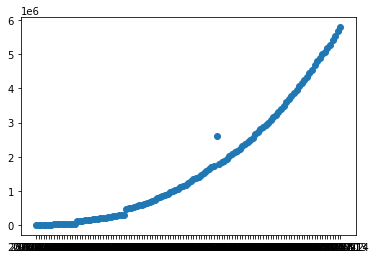

In [ ]:
plt.scatter(testing['date'], testing['tested'])

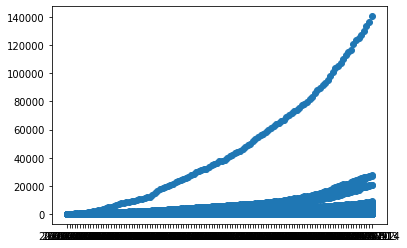

In [ ]:
plt.scatter(cases['date'], cases['totalcountconfirmed'])

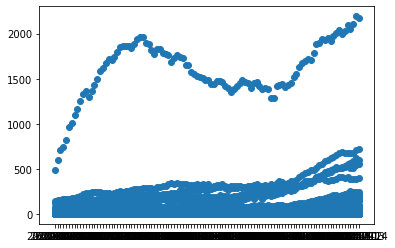

In [ ]:
plt.scatter(hospital_data['todays_date'], hospital_data['hospitalized_covid_confirmed_patients'])

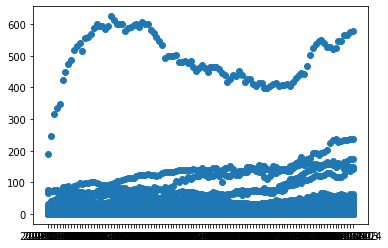

In [ ]:
plt.scatter(hospital_data['todays_date'], hospital_data['icu_covid_confirmed_patients'])

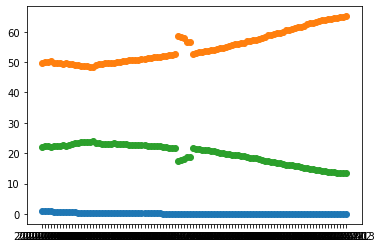

In [ ]:
plt.scatter(age_percent['date'], age_percent['0-17'])
plt.scatter(age_percent['date'], age_percent['18-49'])
plt.scatter(age_percent['date'], age_percent['65+'])